Below is some really complicated equation rearranging the serves the basis of what I will be doing
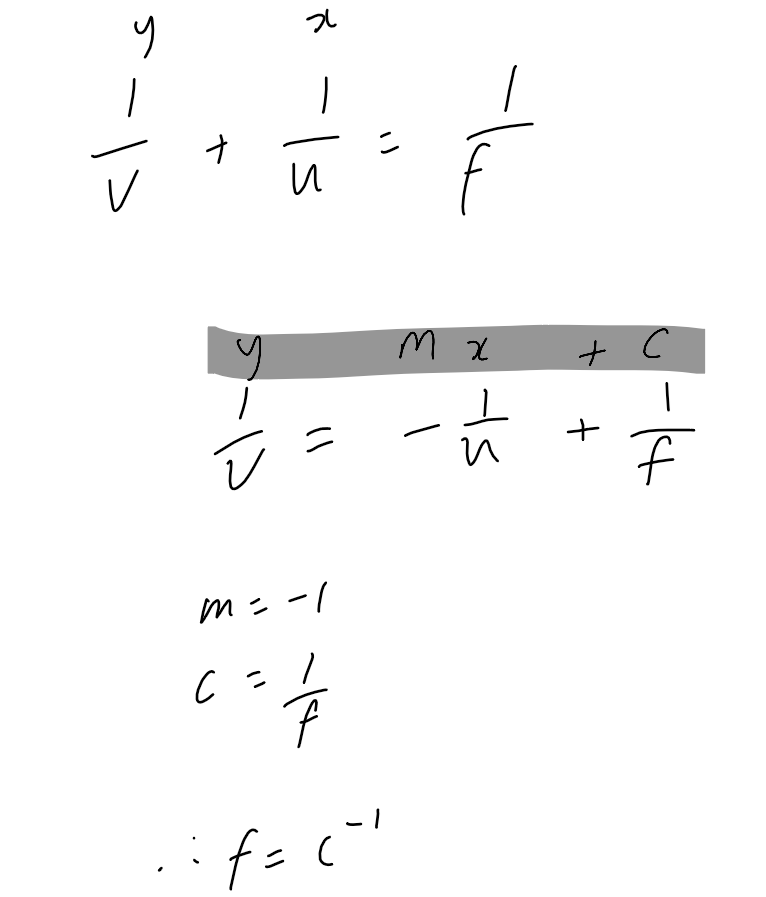
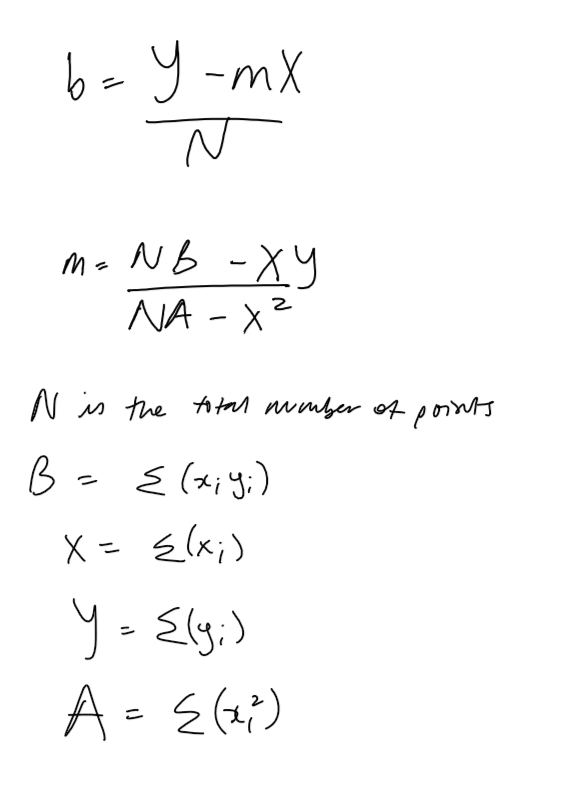

Sources: 
https://math.stackexchange.com/questions/131590/derivation-of-the-formula-for-ordinary-least-squares-linear-regression - Derivation of How Line of Best Fit is Derived
https://www.youtube.com/watch?v=g0HFGtzBtRs - Best Fit Line in 4 Lines of Code — Linear Regression with Python and SciKit-Learn


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# plot a graph of 1/u and 1/v
# all units are in cm

u = [20, 25, 30, 35, 40, 45, 50, 55] # how much the lens has been moved from raybox
v = [65.5, 40, 31, 27, 25, 23.1, 21.5, 20.5] # distance when f is in focus

inverse_u = [1/i for i in u]
inverse_v = [1/j for j in v]

# convert lists to numpy lists
xs = np.array(inverse_u, dtype=np.float64)
ys = np.array(inverse_v, dtype=np.float64)

# function to return the gradient of best fit line and y-intercept
# calculated mathematically
def best_fit_line(xs,ys):
    # defining variables
    n = len(xs) # total number of points
    product_xy = [i*j for i,j in zip(xs,ys)]
    B = sum(product_xy)# the sum of the products of each x and y variable
    X = sum(xs)
    Y = sum(ys)
    xs_squared = [i**2 for i in xs]
    A = sum(xs_squared)
    
    # calculating m and y_intercept
    slope = ((n*B)-(X*Y))/((n*A)-(X**2))
    y_intercept = (Y - (slope*X))/n
    return slope, y_intercept

slope, y_intercept = best_fit_line(xs,ys)
new_x = np.array([0,0.5])
new_y = slope*new_x + y_intercept
# plot the outputs
plt.plot(new_x, new_y)
plt.scatter(xs,ys,label='Thin Lens Equation', alpha=0.7, color='blue',s=60)
plt.xlabel("1/u (cm-1)")
plt.ylabel("1/v (cm-1)")
plt.xlim(0,0.1)
plt.ylim(0,0.1)
plt.title("Task 2")
plt.show()

# output in terminal error of m (percentage away from -1)
print(f"The calculated slope is {slope}.\nThe calculated y_intercept is {y_intercept}.")
percentage_error = ((slope - (-1))/(-1)) * 100 # this is the percentage error from the calculate slope of -1
print(f"The percentage error away from -1 is {percentage_error:.2f}%")
# output in terminal the focal length
    # inverse of "y_intercept"
focal_length = 1/y_intercept
print(f"The focal length is {focal_length:.3f} (to 3dp).")